In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 数据集处理

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)


In [2]:
img_input = keras.layers.Input(shape=(28,28,1))

x = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(img_input)
x = keras.layers.MaxPool2D((2,2),padding='same')(x)
x = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoder = keras.layers.MaxPool2D((2,2),padding = 'same')(x)

x = keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoder)
x = keras.layers.UpSampling2D((2,2))(x)
x = keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same')(x)
x = keras.layers.UpSampling2D((2,2))(x)

decoder = keras.layers.Conv2D(1,(3,3),activation='sigmoid',padding = 'same')(x)

autoencoder = keras.models.Model(inputs = img_input, outputs = decoder)

autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

autoencoder.fit(
    x_train_noisy,
    x_train,
    epochs = 10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy,x_test)
)



Epoch 1/10


InternalError:  dnn PoolBackward launch failed
	 [[node gradient_tape/model/max_pooling2d_1/MaxPool/MaxPoolGrad (defined at C:\Users\kevin\AppData\Local\Temp\ipykernel_13564\1231473724.py:19) ]] [Op:__inference_train_function_921]

Function call stack:
train_function


In [49]:
predict = autoencoder.predict(x_test_noisy)

In [22]:
predict.shape

(10000, 28, 28, 1)

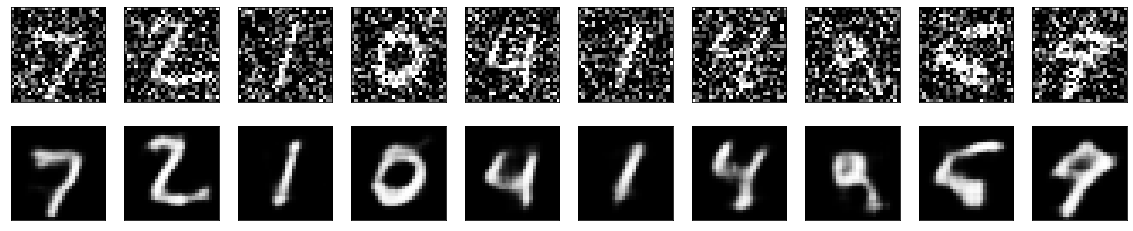

In [47]:
n = 10 # 我們想展⽰圖像的數量
plt.figure(figsize=(20, 4))
for i in range(n):
    # 秀出原圖像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 秀出重建圖像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predict[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [50]:
Inx_N = 5
Err = np.zeros(Inx_N, )
for inx in range(Inx_N):
    test_inp=x_test_noisy[inx,]
    test_inp=np.reshape(test_inp, (1,)+test_inp.shape) 
    results = autoencoder.predict(test_inp,batch_size=1)
    x_comp = x_test[inx, ]
    x_comp =np.reshape(x_comp, (1,)+x_comp.shape) 
    Err[inx] = np.linalg.norm(results - x_comp) / np.linalg.norm(x_comp)
print('Error is {:.2f}'.format(np.sum(Err) / Inx_N))

Error is 0.41
